# Task 9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load the dataset
data = np.load('Data/circle_data_1.npy')

# Transpose data and populate
points = data.T
x_points = points[:, 0]
y_points = points[:, 1]

In [21]:
# Construct the A matrix and b vector for least-squares
N = len(points)
A = np.ones((N, 3))
b = np.zeros(N)

for i in range(N):
    x = x_points[i]
    y = y_points[i]
    A[i, 1] = -2 * x
    A[i, 2] = -2 * y
    b[i] = -(x**2 + y**2)

A

array([[ 1.        ,  3.4090711 , -3.47328761],
       [ 1.        ,  2.35568754, -0.52656519],
       [ 1.        ,  1.90098938, -3.35593188],
       [ 1.        ,  2.87709198,  0.09244163],
       [ 1.        ,  3.36759511, -1.2050373 ],
       [ 1.        ,  0.89709409, -2.63991226],
       [ 1.        ,  3.9227909 , -1.64759832],
       [ 1.        ,  3.02538767, -3.52739821],
       [ 1.        ,  0.38155817, -1.69987076],
       [ 1.        ,  0.21226918, -0.4064507 ],
       [ 1.        ,  1.68901941, -3.25482101],
       [ 1.        ,  0.34872947, -4.64367774],
       [ 1.        ,  4.50884682, -0.70654184],
       [ 1.        ,  2.02902995, -0.56832271],
       [ 1.        ,  2.72199301, -2.88228222],
       [ 1.        ,  0.85789716, -3.59870762],
       [ 1.        ,  0.39146927, -0.17144767],
       [ 1.        ,  3.58906069, -1.26331119],
       [ 1.        ,  0.68842332, -2.83901243],
       [ 1.        ,  0.29731161, -2.4221875 ],
       [ 1.        ,  1.41758816, -0.711

LS Center: (-1.0621, 0.9948)
LS Radius: 0.9789


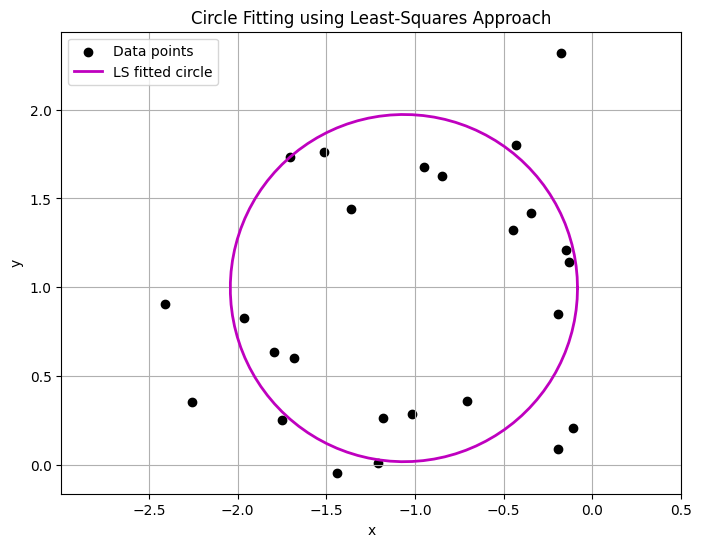

In [22]:
# Solve the least-squares problem
solution, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Extract the solution
y_star = solution[0]
c_ls_x = solution[1]
c_ls_y = solution[2]
c_ls = np.array([c_ls_x, c_ls_y])

# Calculate the radius
R_ls = np.sqrt(np.linalg.norm(c_ls)**2 - y_star)

print(f"LS Center: ({c_ls_x:.4f}, {c_ls_y:.4f})")
print(f"LS Radius: {R_ls:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, color='black', label='Data points')

# Plot the fitted circle
theta = np.linspace(0, 2*np.pi, 100)
circle_x = c_ls_x + R_ls * np.cos(theta)
circle_y = c_ls_y + R_ls * np.sin(theta)
plt.plot(circle_x, circle_y, 'm-', linewidth=2, label='LS fitted circle')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fitting using Least-Squares Approach')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

[[-1.70453555 -1.17784377 -0.95049469 -1.43854599 -1.68379756 -0.44854704
  -1.96139545 -1.51269384 -0.19077909 -0.10613459 -0.84450971 -0.17436473
  -2.25442341 -1.01451497 -1.36099651 -0.42894858 -0.19573463 -1.79453035
  -0.34421166 -0.14865581 -0.70879408 -1.75045907 -1.20965141 -0.12916586
  -2.40887148]
 [ 1.7366438   0.2632826   1.67796594 -0.04622081  0.60251865  1.31995613
   0.82379916  1.7636991   0.84993538  0.20322535  1.62741051  2.32183887
   0.35327092  0.28416136  1.44114111  1.79935381  0.08572384  0.6316556
   1.41950621  1.21109375  0.35587391  0.25375018  0.00760433  1.1439769
   0.90346296]]
(2, 25)
[[ 1.          3.4090711  -3.47328761]
 [ 1.          2.35568754 -0.52656519]
 [ 1.          1.90098938 -3.35593188]
 [ 1.          2.87709198  0.09244163]
 [ 1.          3.36759511 -1.2050373 ]
 [ 1.          0.89709409 -2.63991226]
 [ 1.          3.9227909  -1.64759832]
 [ 1.          3.02538767 -3.52739821]
 [ 1.          0.38155817 -1.69987076]
 [ 1.          0.212

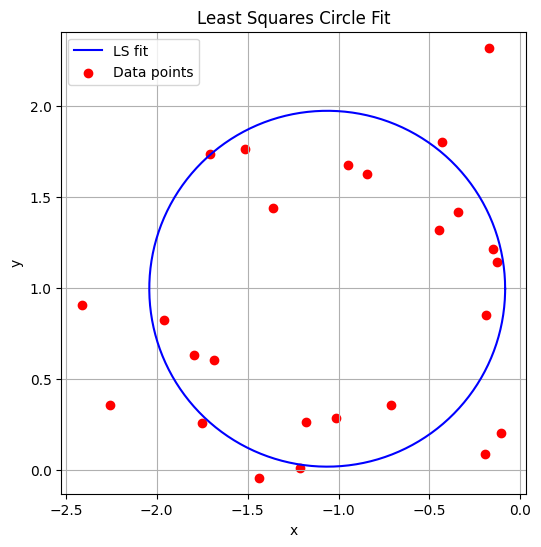

In [24]:
import numpy as np
import matplotlib.pylab as plt

circle_data = np.load("Data/circle_data_1.npy")
print(circle_data)
print(np.shape(circle_data))  # 2 rows x 25 columns.

# Creating the matrices A & b, A = 25 * 3, b = 25 * 1

A = np.zeros((25, 3))  # Matrix A empty

for i in range(25):  # i in range of the rows
    A[i, 0] = 1  # column zero, all 1's
    A[i, 1] = -2 * circle_data[0, i]  # x_i^T is just the row vector
    A[i, 2] = -2 * circle_data[1, i]

print(A)

b = np.zeros((25, 1))  # Matrix b empty

for i in range(25):
    b[i, 0] = -(np.linalg.norm(circle_data[:, i]) ** 2)

print(b)

x_atomic, residuals, rank, s = np.linalg.lstsq(
    A, b, rcond=None
)  # Atomic problem very easy to solve

print("Shape of solution:", x_atomic.shape)
y_optimal = x_atomic[0]
c_optimal = x_atomic[1:]

# Computing R:

R_ls = np.sqrt(np.linalg.norm(c_optimal) ** 2 - y_optimal)
print(f"The optimal value of R using least squares is {R_ls}")


cx, cy = (
    c_optimal.flatten()
)  # c_optimal is shape (2,1) or (2,), flatten ensures scalars


theta = np.linspace(0, 2 * np.pi, 300)
circle_x = cx + R_ls * np.cos(theta)
circle_y = cy + R_ls * np.sin(theta)


plt.figure(figsize=(6, 6))
plt.plot(circle_x, circle_y, label="LS fit", color="blue")  # Fitted circle
plt.scatter(
    circle_data[0, :], circle_data[1, :], color="red", label="Data points"
)  # Original points
plt.grid(True)
plt.axis("equal")  # Preserve aspect ratio
plt.legend()
plt.title("Least Squares Circle Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()